## 1. 预测区间

#### 置信区间 vs 预测区间

置信区间(Confidence Interval): 与总体参数相关的不确定性区间，如回归系数$\beta_i$和$E(Y/X_0)$.

预测区间(Predition Interval): 单个预测值($\hat{y}$)的不确定区间。

回归模型用样本推断总体，观测值存在测量误差，这些都是不确定性的来源。

#### 自助法生成回归系数的置信区间

自主算法(Bootstrap Algorithm)

1. 从数据集中随机抽取1个观测值(包含所有特征和目标变量)，放回。
2. 重复第一步n次，有放回重复采样，得到一个自助法重抽样。
3. 根据第二步的结果拟合回归模型，记录所有的估计系数。
4. 重复第一步到第三步k次，k足够大，例如1000。
5. 每个回归系数都有1000个估计值，对于特定的系数，计算第5百分位数和95百分位数，即可获得改系数的90%置信区间。

#### 自助法生成点预测值的预测区间

1. 从数据集中获取自助样本。
2. 拟合回归模型，预测，记录点预测值。
3. 重复前两步k次，k足够大，例如1000。
4. 当前有1000个点预测值，计算第5百分位数和第95百分位数，即可获得点预测的90%的置信区间。

## 2. 用statsmodels计算预测区间

[statsmodel](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html?highlight=prediction%20interval)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

合成数据，假设双变量回归模型: $y_i = 2.0 + 3.5x_i + \epsilon_i$

In [22]:
# 设置随机数种子
np.random.seed(123)

nsamples = 50
betas = [2.0, 3.5]  # 截距系数，斜率系数
X = np.random.uniform(0, 1, nsamples)
e = np.random.normal(size=nsamples)

# 模型需要截距项，先添加常数列
X = sm.add_constant(X)

# 生成 y
y = np.dot(X, betas) + e

用statsmodels拟合回归模型。

In [23]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     21.20
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           3.06e-05
Time:                        09:59:29   Log-Likelihood:                -76.092
No. Observations:                  50   AIC:                             156.2
Df Residuals:                      48   BIC:                             160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2717      0.381      5.968      0.0

调用wls_prediction_std()计算预测区间。

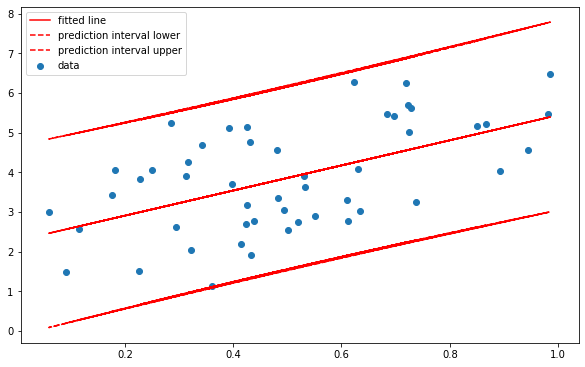

In [31]:
pred_std, interval_lower, interval_upper = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(10, 6.18))
ax.scatter(X[:,1], y, label="data")
ax.plot(X[:,1], results.fittedvalues, "r", label="fitted line")
ax.plot(X[:,1], interval_lower, "r--", label="prediction interval lower")
ax.plot(X[:,1], interval_upper, "r--", label="prediction interval upper")
ax.legend(loc="best")